In [1]:
%matplotlib inline


# SVM: Separating hyperplane for unbalanced classes

Find the optimal separating hyperplane using an SVC for classes that
are unbalanced.

We first find the separating plane with a plain SVC and then plot
(dashed) the separating hyperplane with automatically correction for
unbalanced classes.

.. currentmodule:: sklearn.linear_model

<div class="alert alert-info"><h4>Note</h4><p>This example will also work by replacing ``SVC(kernel="linear")``
    with ``SGDClassifier(loss="hinge")``. Setting the ``loss`` parameter
    of the :class:`SGDClassifier` equal to ``hinge`` will yield behaviour
    such as that of a SVC with a linear kernel.

    For example try instead of the ``SVC``::

        clf = SGDClassifier(n_iter=100, alpha=0.01)</p></div>


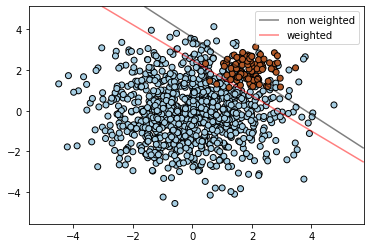

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [disp.surface_.collections[0], wdisp.surface_.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()